# AI workshops - replicate of Latent Space Data Fusion study
This program try to replicate results of [Hybrid Latent Space Data Fusion Method for Multimodal Emotion Recognition](https://ieeexplore.ieee.org/abstract/document/8911364) study that was based on [
DEAP dataset](https://www.eecs.qmul.ac.uk/mmv/datasets/deap/readme.html). Most of the text was taken from original study.


In [13]:
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import ShortTermFeatures
import matplotlib.pyplot as plt
import cv2
import skvideo.io
import pprint
import numpy as np
import scenedetect
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.detectors import ContentDetector

c:\Users\malcz\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


![alt text](./img/schema.jpg)

## Audio Analysing

The following code uses feature_extraction() of the ShortTermFeatures.py file to extract the short term feature sequences for an audio signal, using a frame size of 50 msecs and a frame step of 25 msecs (50% overlap).

In [34]:
vid = 'vid_7.wav'
[Fs, x] = audioBasicIO.read_audio_file("./data/audio/" + vid)
F, f_names = ShortTermFeatures.feature_extraction(x, Fs, 0.050*Fs, 0.025*Fs)

#### Zero crossing rate
The number of times the audio signal crosses the x-axis, the zero line, or signal cahnge per unit time is known as zero crossing rate.

Text(0, 0.5, 'zcr')

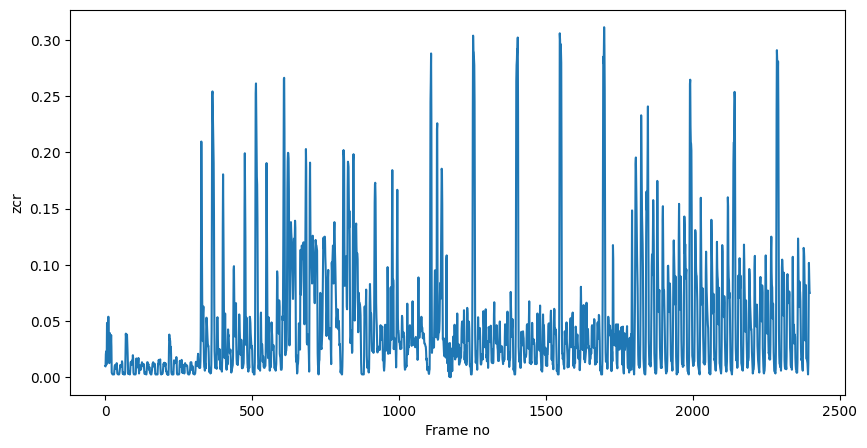

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]) 

#### MFCC coefficient
hese coefficients represent the spectral shape of the audio signal via the nonlinear Mel scale

Text(0.5, 0, 'Frame no')

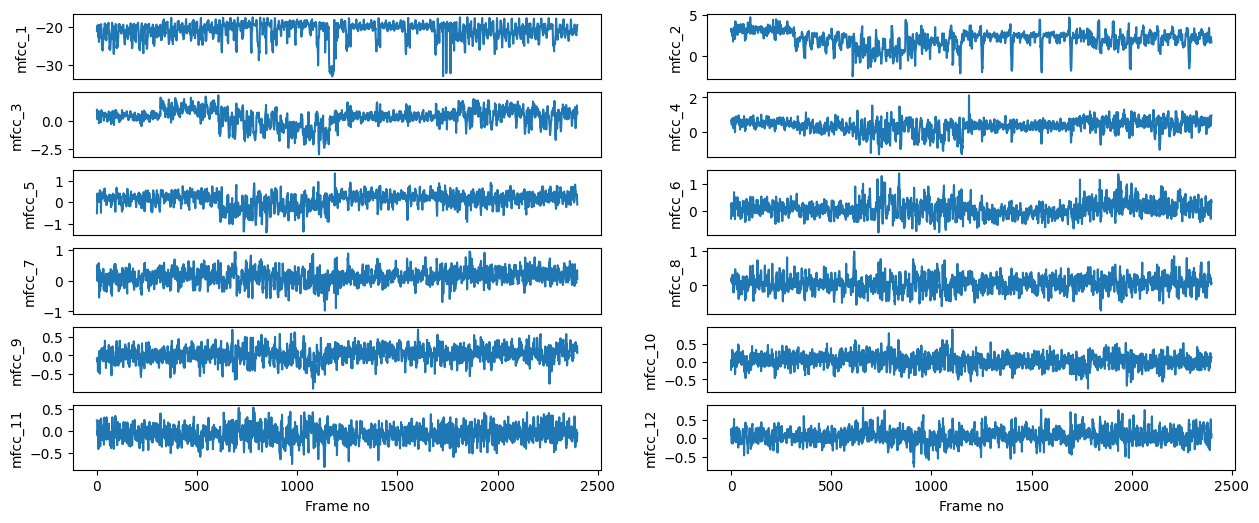

In [36]:
plt.figure(figsize=(15, 12))
plt.subplot(12,2,1); plt.plot(F[8,:]); plt.ylabel(f_names[8]); plt.xticks([])
plt.subplot(12,2,2); plt.plot(F[9,:]); plt.ylabel(f_names[9]); plt.xticks([])
plt.subplot(12,2,3); plt.plot(F[10,:]); plt.ylabel(f_names[10]); plt.xticks([])
plt.subplot(12,2,4); plt.plot(F[11,:]); plt.ylabel(f_names[11]); plt.xticks([])
plt.subplot(12,2,5); plt.plot(F[12,:]); plt.ylabel(f_names[12]); plt.xticks([])
plt.subplot(12,2,6); plt.plot(F[13,:]); plt.ylabel(f_names[13]); plt.xticks([])
plt.subplot(12,2,7); plt.plot(F[14,:]); plt.ylabel(f_names[14]); plt.xticks([])
plt.subplot(12,2,8); plt.plot(F[15,:]); plt.ylabel(f_names[15]); plt.xticks([])
plt.subplot(12,2,9); plt.plot(F[16,:]); plt.ylabel(f_names[16]); plt.xticks([])
plt.subplot(12,2,10); plt.plot(F[17,:]); plt.ylabel(f_names[17]); plt.xticks([])
plt.subplot(12,2,11); plt.plot(F[18,:]); plt.ylabel(f_names[18]); plt.xlabel('Frame no')
plt.subplot(12,2,12); plt.plot(F[19,:]); plt.ylabel(f_names[19]); plt.xlabel('Frame no')

#### Pitch
It shows the basic frequency of the signal from the emotional viewpoint, the rhythm and the average pitch of the audio signal is related to the valence. For example, ‘‘sadness’’ is in accordance with a low standard deviation, while ‘‘discomfort’’ is associated with a higher amount of pitch. It has also been shown that happiness and discomfort usually have a higher average pitch and higher talk rate. However, sadness is represented by lower average pitch and lower talk rate. 

A 12-element representation of the spectral energy where the bins represent the 12 equal-tempered pitch classes of western-type music (semitone spacing).

Text(0.5, 0, 'Frame no')

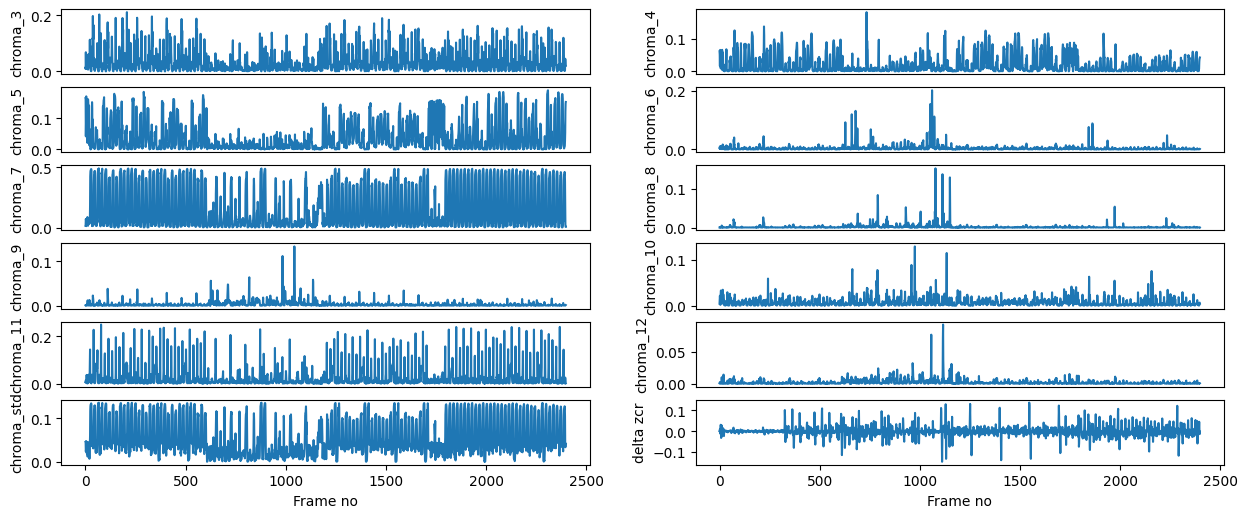

In [37]:
plt.figure(figsize=(15, 12))
plt.subplot(12,2,1); plt.plot(F[23,:]); plt.ylabel(f_names[23]); plt.xticks([])
plt.subplot(12,2,2); plt.plot(F[24,:]); plt.ylabel(f_names[24]); plt.xticks([])
plt.subplot(12,2,3); plt.plot(F[25,:]); plt.ylabel(f_names[25]); plt.xticks([])
plt.subplot(12,2,4); plt.plot(F[26,:]); plt.ylabel(f_names[26]); plt.xticks([])
plt.subplot(12,2,5); plt.plot(F[27,:]); plt.ylabel(f_names[27]); plt.xticks([])
plt.subplot(12,2,6); plt.plot(F[28,:]); plt.ylabel(f_names[28]); plt.xticks([])
plt.subplot(12,2,7); plt.plot(F[29,:]); plt.ylabel(f_names[29]); plt.xticks([])
plt.subplot(12,2,8); plt.plot(F[30,:]); plt.ylabel(f_names[30]); plt.xticks([])
plt.subplot(12,2,9); plt.plot(F[31,:]); plt.ylabel(f_names[31]); plt.xticks([])
plt.subplot(12,2,10); plt.plot(F[32,:]); plt.ylabel(f_names[32]); plt.xticks([])
plt.subplot(12,2,11); plt.plot(F[33,:]); plt.ylabel(f_names[33]); plt.xlabel('Frame no')
plt.subplot(12,2,12); plt.plot(F[34,:]); plt.ylabel(f_names[34]); plt.xlabel('Frame no')

The standard deviation of the 12 chroma coefficients.

Text(0.5, 0, 'Frame no')

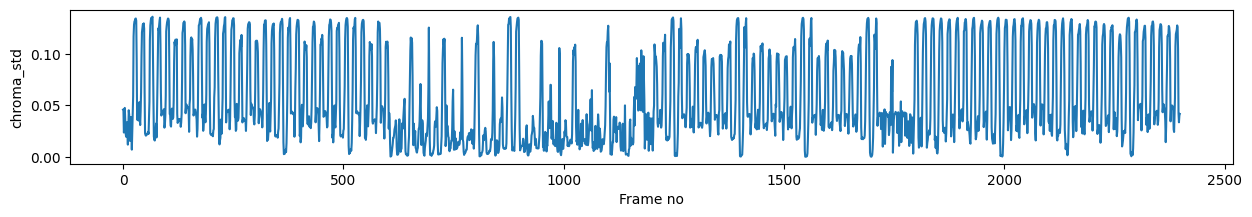

In [38]:
plt.figure(figsize=(15, 2))
plt.plot(F[33,:]); plt.ylabel(f_names[33])
plt.xlabel('Frame no')

#### Energy
It shows the signal strength or total energy of signal. From the emotional point of view, the energy associated with an audio signal of exciting emotions (e.g., discomfort or happiness) is higher than that of an audio signal containing sadness or fatigue emotions 

Text(0, 0.5, 'energy')

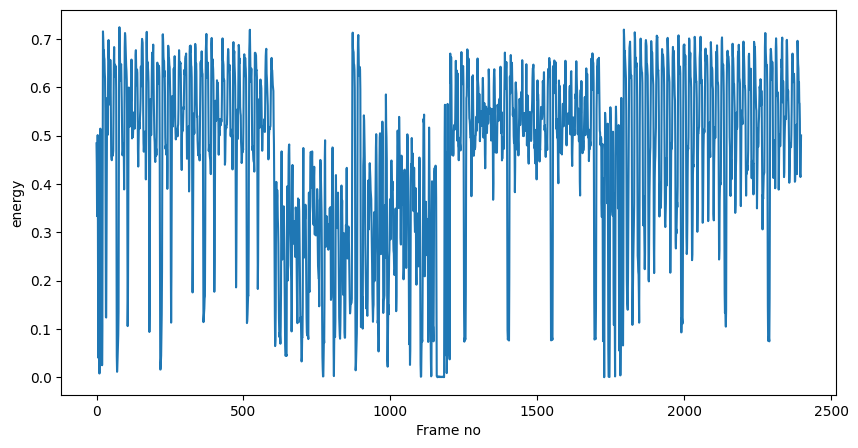

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]) 

## Video Analysing

#### Shot length 
The shot refers to sequential frames captured by a camera with no discernible color change in the content of the successive images. From the viewpoint of the viewer, the rapid changes in the scene indicate the dynamic and exciting nature of the scene


Following code use PySceneDetect to determine shot length.

In [24]:
video_path = './data/video_edited/vid_6.mp4'
video_manager = VideoManager([video_path])
scene_manager = SceneManager()
scene_manager.add_detector(ContentDetector())
video_manager.start()
scene_manager.detect_scenes(frame_source=video_manager)

shot_list = scene_manager.get_scene_list()
print(f"Detected {len(shot_list)} shots in the video.")
for shot in shot_list:
    print(f"Shot start frame: {shot[0].get_frames()}")

video_manager.release()

VideoManager is deprecated and will be removed.


Detected 55 shots in the video.
Shot start frame: 0
Shot start frame: 32
Shot start frame: 69
Shot start frame: 97
Shot start frame: 130
Shot start frame: 157
Shot start frame: 231
Shot start frame: 264
Shot start frame: 286
Shot start frame: 301
Shot start frame: 328
Shot start frame: 349
Shot start frame: 378
Shot start frame: 413
Shot start frame: 452
Shot start frame: 490
Shot start frame: 522
Shot start frame: 558
Shot start frame: 580
Shot start frame: 606
Shot start frame: 628
Shot start frame: 661
Shot start frame: 681
Shot start frame: 707
Shot start frame: 727
Shot start frame: 745
Shot start frame: 767
Shot start frame: 791
Shot start frame: 816
Shot start frame: 841
Shot start frame: 862
Shot start frame: 894
Shot start frame: 925
Shot start frame: 946
Shot start frame: 974
Shot start frame: 1004
Shot start frame: 1031
Shot start frame: 1060
Shot start frame: 1088
Shot start frame: 1146
Shot start frame: 1171
Shot start frame: 1218
Shot start frame: 1280
Shot start frame: 1

#### lighting key
It has been shown that the amount and distribution of light in relation to the shadow and darkness of the scene are the primary visual aids for regulating emotional states


The formula for the lighting key value for a frame is:

LKf=δf×σf

Where:

δf - is the average pixel intensity of the frame.

σf - is the variance of the pixel intensity values of the frame.

Text(0.5, 1.0, 'Lighting Key Value for each frame')

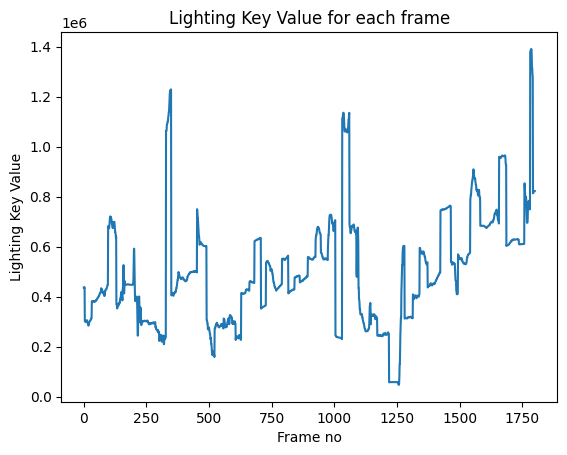

In [28]:

def calculate_lighting_key(frame):
    """
    Calculate the lighting key value for a given frame.
    Parameters:
        frame (np.array): Input frame in grayscale.
    Returns:
        LKf (float): Lighting key value for the frame.
    """
    pixel_values = frame.flatten()
    delta_f = np.mean(pixel_values)
    sigma_f = np.var(pixel_values)
    LKf = delta_f * sigma_f
    
    return LKf

def process_video(video_path):
    """
    Process the video to calculate lighting key value for each frame.
    Parameters:
        video_path (str): Path to the input video.
    Returns:
        lighting_key_values (list): List of lighting key values for each frame.
    """
    cap = cv2.VideoCapture(video_path)
    lighting_key_values = []
    
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        LKf = calculate_lighting_key(gray_frame)
        lighting_key_values.append(LKf)
        
        frame_count += 1
    cap.release()
    return lighting_key_values

video_path = './data/video_edited/vid_6.mp4'
lighting_key_values = process_video(video_path)

plt.plot(lighting_key_values)
plt.xlabel('Frame no')
plt.ylabel('Lighting Key Value')
plt.title('Lighting Key Value for each frame')

#### Color
Color and its related features play an important role in stimulating emotions. For example, it has been shown that yellow, orange, and red are associated with feelings of fear and discomfort, while blue, purple, and green can evoke feelings of high valence and low arousal in the viewer. Physiological studies on color have also shown that valence is associated with bright colors and arousal with color saturation. It has been shown in that the amount of color in the video is related to the color energy. The color energy is calculated by:

ColorEnergy^k = ∑^(PixelNum)_(j=1) (s_j × v_j)/(std_Hist × PixelNum)

Text(0.5, 1.0, 'Hue Histogram (bin 0) for each frame')

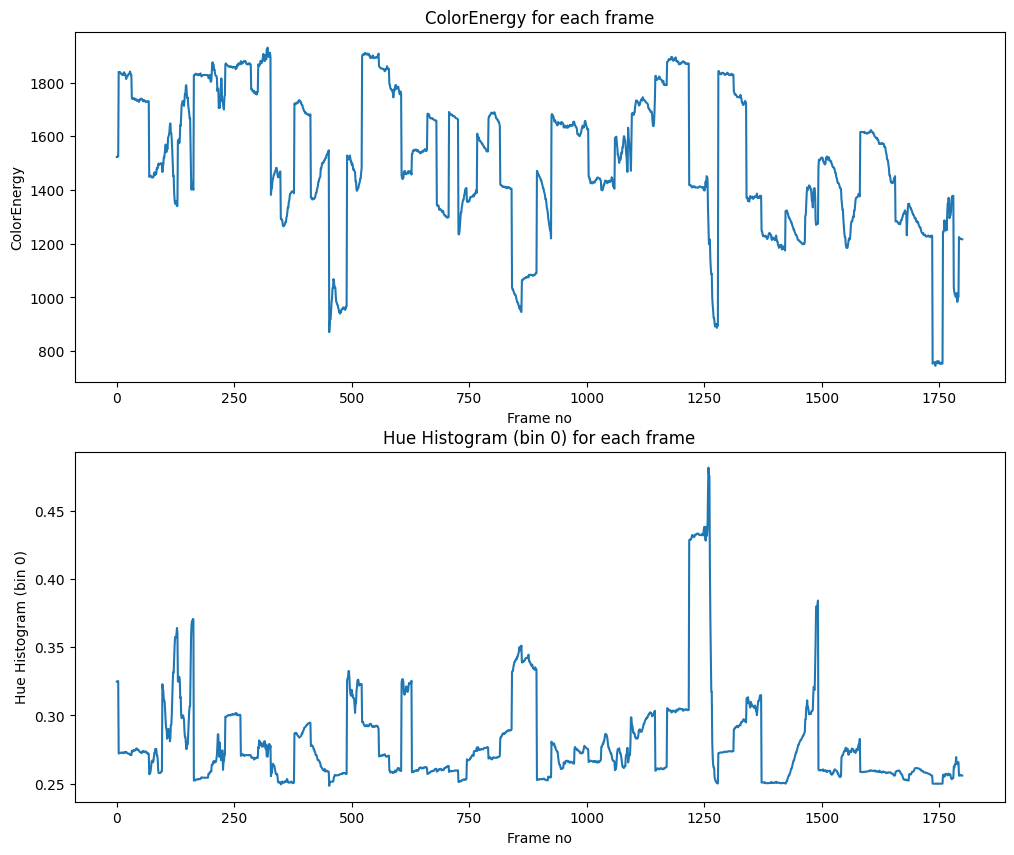

In [33]:
def calculate_color_energy(hsv_frame):
    """
    Calculate ColorEnergy for a given frame in HSV space.
    Parameters:
        hsv_frame (np.array): Input frame in HSV color space.
    Returns:
        color_energy (float): The ColorEnergy of the frame.
        hue_histogram (np.array): 16-bin hue histogram of the frame.
    """
    h, s, v = cv2.split(hsv_frame)
    pixel_num = h.size
    hue_histogram = cv2.calcHist([h], [0], None, [16], [0, 180])
    hue_histogram = hue_histogram / pixel_num
    std_hist = np.std(hue_histogram)
    if std_hist < 1e-6:
        std_hist = 1e-6
    color_energy = np.sum((s * v)) / (std_hist * pixel_num)
    
    return color_energy, hue_histogram

def process_video(video_path):
    """
    Process the video to calculate ColorEnergy and hue histogram for each frame.
    Parameters:
        video_path (str): Path to the input video.
    Returns:
        results (list): List of tuples containing ColorEnergy and hue histogram for each frame.
    """
    cap = cv2.VideoCapture(video_path)
    results = []
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        color_energy, hue_histogram = calculate_color_energy(hsv_frame)
        results.append((color_energy, hue_histogram))
        
        frame_count += 1
    
    cap.release()
    
    return results

video_path = './data/video_edited/vid_6.mp4'
results = process_video(video_path)

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot([color_energy for color_energy, _ in results])
plt.xlabel('Frame no')
plt.ylabel('ColorEnergy')
plt.title('ColorEnergy for each frame')
plt.subplot(2, 1, 2)
plt.plot([hue_histogram[0] for _, hue_histogram in results])
plt.xlabel('Frame no')
plt.ylabel('Hue Histogram (bin 0)')
plt.title('Hue Histogram (bin 0) for each frame')


#### Motion
It has been shown that there is a relationship between camera movement and emotions such as happiness, sadness, and fear. Psychological-physiological studies have also shown that there is a relationship between the intensity of the aroused emotion in the viewer and the observation of movement in the video.